In [369]:
import duckdb
import pandas as pd
import numpy as np
from sandbox_generator import createSandbox
from time import time

In [370]:
import duckdb
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [371]:
con = duckdb.connect('data/exploitation.db')
df = con.execute("select * sandbox_T_apartment_S_ga_fl_preprocessed").df()

In [372]:
df = df.sample(round(len(df)*0.1), random_state=777) 

In [373]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# select columns
y_col = 'price'
x_cols_binary = ['cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']
x_cols_numeric = [
    'sqfeet', 'beds', 'baths','lat', 'long','num_hospitals', 'num_beds', 'hospital_type_general', 'hospital_type_critical',
    'hospital_type_psychiatric', 'hospital_type_longterm', 'hospital_type_children','government_hospital', 'nonprofit_hospital',
    'num_schools', 'num_students', 'preschool', 'elementary_school', 'middle_school', 'high_school'
]
x_cols_onehot = ['type', 'state']

In [374]:
# make everything numeric and scaled
bin2num = lambda x: 1 if x=='Yes' or x==1 else 0
for col in x_cols_binary:
    df[col] = df[col].apply(bin2num)

# one-hot encoding in categorical variables
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[x_cols_onehot])

cols_encoded = []
for i in range(len(x_cols_onehot)):
  col = x_cols_onehot[i]
  print("col: ", col)
  for name in enc.categories_[i]:
    cols_encoded.append(str(col+'_'+name[0:].strip()).lower().strip())
    print("name: ", str(col+'_'+name[0:].strip()).lower().strip())

df_onehot_encoded = pd.DataFrame(enc.transform(df[x_cols_onehot]).toarray(), columns = cols_encoded)

# scaling numerical variables:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[x_cols_numeric]), columns = x_cols_numeric)



col:  type
name:  type_apartment
name:  type_condo
name:  type_duplex
name:  type_flat
name:  type_house
name:  type_loft
name:  type_manufactured
name:  type_townhouse
col:  state
name:  state_ak
name:  state_al
name:  state_ar
name:  state_az
name:  state_ca
name:  state_co
name:  state_ct
name:  state_dc
name:  state_de
name:  state_fl
name:  state_ga
name:  state_hi
name:  state_ia
name:  state_id
name:  state_il
name:  state_in
name:  state_ks
name:  state_ky
name:  state_la
name:  state_ma
name:  state_md
name:  state_me
name:  state_mi
name:  state_mn
name:  state_mo
name:  state_ms
name:  state_mt
name:  state_nc
name:  state_nd
name:  state_ne
name:  state_nh
name:  state_nj
name:  state_nm
name:  state_nv
name:  state_ny
name:  state_oh
name:  state_ok
name:  state_or
name:  state_pa
name:  state_ri
name:  state_sc
name:  state_sd
name:  state_tn
name:  state_tx
name:  state_ut
name:  state_va
name:  state_wa
name:  state_wi
name:  state_wv
name:  state_wy


In [375]:
# columns in the one-hot encoding
print(enc.feature_names_in_)
print(enc.categories_)

# parameters used in the scaling
print(scaler.feature_names_in_)
print(scaler.mean_)
print(scaler.scale_)

['type' 'state']
[array(['apartment', 'condo', 'duplex', 'flat', 'house', 'loft',
       'manufactured', 'townhouse'], dtype=object), array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'wa', 'wi', 'wv', 'wy'], dtype=object)]
['sqfeet' 'beds' 'baths' 'lat' 'long' 'num_hospitals' 'num_beds'
 'hospital_type_general' 'hospital_type_critical'
 'hospital_type_psychiatric' 'hospital_type_longterm'
 'hospital_type_children' 'government_hospital' 'nonprofit_hospital'
 'num_schools' 'num_students' 'preschool' 'elementary_school'
 'middle_school' 'high_school']
[ 9.70523571e+02  1.82800000e+00  1.45100000e+00  3.71637273e+01
 -9.30299552e+01  1.62601100e+03  2.69647041e+05  9.47694000e+02
  5.38900000e+01  2.15093000e+02  1.45281000e+02  4.1

In [376]:
df_processed = pd.concat(objs=[
    df[x_cols_binary], df_onehot_encoded, df_scaled, df[[y_col]]
], axis = 1
)

df_processed.fillna(0, inplace=True)

df_processed.head()

,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_apartment,type_condo,type_duplex,type_flat,...,hospital_type_children,government_hospital,nonprofit_hospital,num_schools,num_students,preschool,elementary_school,middle_school,high_school,price
183181,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
109968,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,680.0
12923,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,990.0
302802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,374.0
46863,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,965.0


In [377]:
# split training set and test set and validation set
df_train, df_val, df_test = np.split(
    df_processed.sample(frac=1, random_state=777),
    [ int(0.6*len(df_processed)) , int(0.8*len(df_processed)) ]
    )

X_train = df_train.drop(y_col, axis=1).to_numpy()
y_train = df_train[y_col].to_numpy()
X_val = df_val.drop(y_col, axis=1).to_numpy()
y_val = df_val[y_col].to_numpy()
X_test = df_test.drop(y_col, axis=1).to_numpy()
y_test = df_test[y_col].to_numpy()

# Feature Selection

In [378]:
import scipy.io
from skfeature.function.similarity_based import fisher_score
#from skfeature.function.wrapper import decision_tree_backward # Not work
#from skfeature.function.wrapper import svm_backward # Not work
from skfeature.function.information_theoretical_based.CIFE import cife


In [379]:
tic = time()
score = fisher_score.fisher_score(X_train, y_train)
toc = time()

print(f"Done in {toc - tic:.3f}s")

#score_dc = decision_tree_backward(X_train, y_train,10)
#score_svm = svm_backward.svm_backward(X_train, y_train,15)

tic = time()
(best_cife,_,coef_cife) = cife(X_train, y_train)
toc = time()

print(f"Done in {toc - tic:.3f}s")

Done in 1.140s
Done in 1.399s


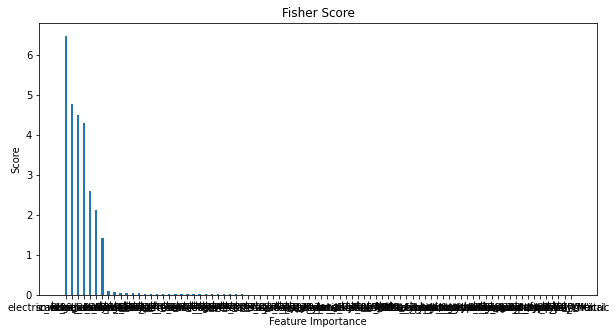

In [380]:
name_columns = list(df_processed.drop(y_col, axis=1).columns)
named_score = [(name_columns[i],score[i]) for i in range(len(score))]

named_score.sort(key=lambda a: a[1], reverse=True)
key = [a for (a,_) in named_score]
value = [b for (_,b) in named_score]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key, value, width = 0.4)
 
plt.xlabel("Feature Importance")
plt.ylabel("Score")
plt.title("Fisher Score")
plt.show()

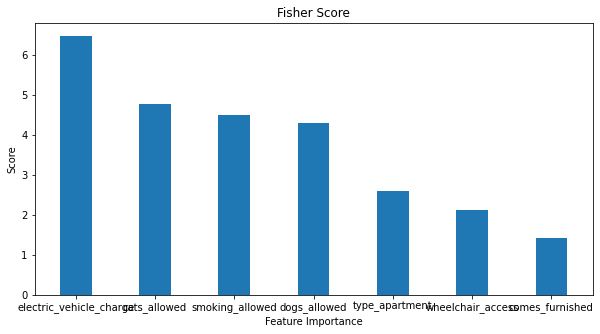

In [381]:
key_important = [a for (a,b) in named_score if b >= 1]
value_important = [b for (_,b) in named_score if b >= 1]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key_important, value_important, width = 0.4)
 
plt.xlabel("Feature Importance")
plt.ylabel("Score")
plt.title("Fisher Score")
plt.show()

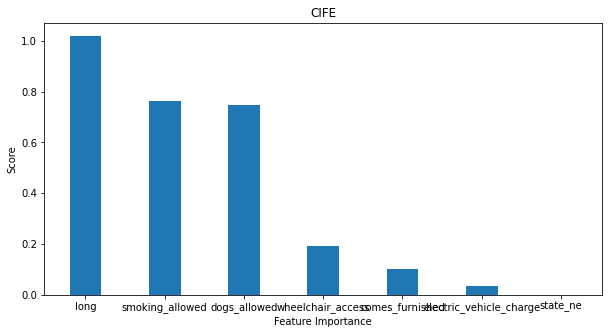

In [382]:
name_columns = list(df_processed.drop(y_col, axis=1).columns)
named_cife = [(name_columns[best_cife[i]],coef_cife[i]) for i in range(len(best_cife))]

named_cife.sort(key=lambda a: a[1], reverse=True)
feature_cife = [a for (a,_) in named_cife]
value = [b for (_,b) in named_cife]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(feature_cife, value, width = 0.4)
 
plt.xlabel("Feature Importance")
plt.ylabel("Score")
plt.title("CIFE")
plt.show()

In [383]:
named_cife

[('long', 1.0186917967417752),
 ('smoking_allowed', 0.7621791579597046),
 ('dogs_allowed', 0.7480825234817905),
 ('wheelchair_access', 0.19250283526064838),
 ('comes_furnished', 0.10115747013066123),
 ('electric_vehicle_charge', 0.03675071589312129),
 ('state_ne', 0.0)]

In [384]:
from sklearn.ensemble import RandomForestRegressor
tic = time()
rf = RandomForestRegressor(oob_score=True,random_state=40).fit(X_train, y_train)
toc = time()
print(f"Done in {toc - tic:.3f}s")

Done in 0.245s


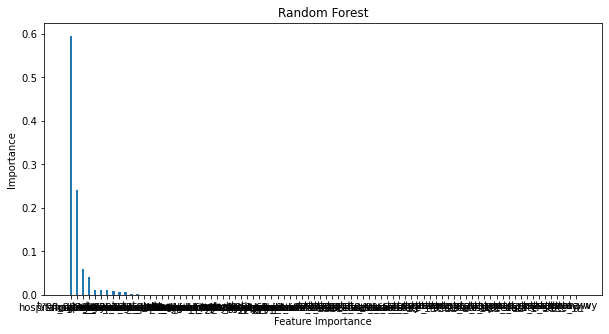

In [385]:
named_rf = [(name_columns[i],rf.feature_importances_[i]) for i in range(len(name_columns))]
named_rf.sort(key=lambda a: a[1], reverse=True)
key_important = [a for (a,b) in named_rf]
value_important = [b for (_,b) in named_rf]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key_important, value_important, width = 0.4)
 
plt.xlabel("Feature Importance")
plt.ylabel("Importance")
plt.title("Random Forest")
plt.show()

In [386]:
from sklearn.feature_selection import SelectFromModel
threshold = np.mean(rf.feature_importances_)
sfm = SelectFromModel(rf, threshold=threshold).fit(X_train, y_train)
feature_rf = list(df_processed.drop(y_col, axis=1).columns[sfm.get_support()])
print(feature_rf)

['smoking_allowed', 'type_apartment', 'beds', 'hospital_type_critical']


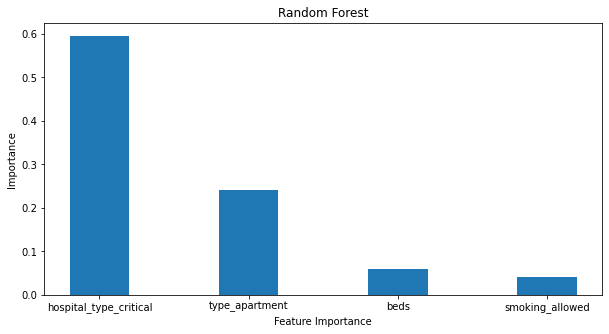

In [387]:
named_rf = [(name_columns[i],rf.feature_importances_[i]) for i in range(len(name_columns))]
named_rf.sort(key=lambda a: a[1], reverse=True)
feature_rf = [a for (a,b) in named_rf if b > threshold]
value_important = [b for (_,b) in named_rf if b > threshold]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(feature_rf, value_important, width = 0.4)
 
plt.xlabel("Feature Importance")
plt.ylabel("Importance")
plt.title("Random Forest")
plt.show()

In [388]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [389]:
def printMetrics(y_true, y_pred):
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("MAE: ", metrics.mean_absolute_error(y_true, y_pred))
    print("MAPE: ", metrics.mean_absolute_percentage_error(y_true, y_pred))
    print("R2: ", metrics.r2_score(y_true, y_pred))
    print()

In [390]:
X_fs = df_processed.loc[:, key_important].to_numpy()
X_cife = df_processed.loc[:, feature_cife].to_numpy()
X_rf = df_processed.loc[:, feature_rf].to_numpy()

X_train_fs, X_test_fs, _, _ = train_test_split(X_fs, y, test_size=0.2, random_state=40)
X_train_cife, X_test_cife, _, _ = train_test_split(X_cife, y, test_size=0.2, random_state=40)
X_train_rf, X_test_rf, _, _ = train_test_split(X_rf, y, test_size=0.2, random_state=40)

print(np.shape(X_train))
print(np.shape(X_train_fs))
print(np.shape(X_train_cife))
print(np.shape(X_train_rf))

(1196, 84)
(1595, 84)
(1595, 7)
(1595, 4)


In [391]:
id_fisher = [i for i in range(len(score)) if score[i] > 1]
id_cife = list(best_cife)
id_rf = [i for i in range(len(rf.feature_importances_)) if rf.feature_importances_[i] > threshold]

X_train_fs, X_val_fs = X_train[:,id_fisher], X_val[:,id_fisher]
X_train_cife, X_val_cife = X_train[:,id_cife], X_val[:,id_cife]
X_train_rf, X_val_rf = X_train[:,id_rf], X_val[:,id_rf]

print(np.shape(X_train))
print(np.shape(X_train_fs))
print(np.shape(X_train_cife))
print(np.shape(X_train_rf))

(1196, 84)
(1196, 7)
(1196, 7)
(1196, 4)


In [392]:
print(np.shape(X_val))
print(np.shape(X_val_fs))
print(np.shape(X_val_cife))
print(np.shape(X_val_rf))

(399, 84)
(399, 7)
(399, 7)
(399, 4)


# Test Models

In [393]:
tic = time()
reg = LinearRegression().fit(X_train, y_train)
toc = time()

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
print(f"Done in {toc - tic:.3f}s")


0.5854551094674469
-7.8779306152612e+20
Done in 0.006s


In [394]:
tic = time()
reg = LinearRegression().fit(X_train_fs, y_train)
toc = time()

print(reg.score(X_train_fs, y_train))
print(reg.score(X_val_fs, y_val))
print(f"Done in {toc - tic:.3f}s")

0.4432734800561484
0.6061477538665934
Done in 0.004s


In [395]:
tic = time()
reg = LinearRegression().fit(X_train_cife, y_train)
toc = time()

print(reg.score(X_train_cife, y_train))
print(reg.score(X_val_cife, y_val))
print(f"Done in {toc - tic:.3f}s")

0.3306350418961621
0.5320959591887794
Done in 0.005s


In [396]:
tic = time()
reg = LinearRegression().fit(X_train_rf, y_train)
toc = time()

print(reg.score(X_train_rf, y_train))
print(reg.score(X_val_rf, y_val))
print(f"Done in {toc - tic:.3f}s")

0.43202220931811974
0.5783320656699827
Done in 0.003s


# Random Forest

In [397]:
tic = time()
rf = RandomForestRegressor(oob_score=True).fit(X_train, y_train)
toc = time()

yhat_train = rf.predict(X_train)
yhat_val = rf.predict(X_val)

printMetrics(y_train, yhat_train)
printMetrics(y_val, yhat_val)
print(f"Done in {toc - tic:.3f}s")

RMSE:  485.47366847730075
MAE:  198.40363089877698
MAPE:  1.0224955325976294e+16
R2:  0.6035611274038863

RMSE:  356.4535561472881
MAE:  172.8673182638008
MAPE:  3.090701987867661e+16
R2:  0.7226679581529822

Done in 0.255s


In [398]:
tic = time()
rf = RandomForestRegressor(oob_score=True).fit(X_train_fs, y_train)
toc = time()

yhat_train_fs = rf.predict(X_train_fs)
yhat_val_fs = rf.predict(X_val_fs)

printMetrics(y_train, yhat_train_fs)
printMetrics(y_val, yhat_val_fs)
print(f"Done in {toc - tic:.3f}s")

RMSE:  540.1803630650475
MAE:  248.5194137052466
MAPE:  1.6904842083220752e+17
R2:  0.5091797653404844

RMSE:  400.9840417480212
MAE:  223.5603643467185
MAPE:  1.8917225022610358e+17
R2:  0.6490475135972191

Done in 0.101s


In [399]:
tic = time()
rf = RandomForestRegressor(oob_score=True).fit(X_train_cife, y_train)
toc = time()

yhat_train_cife = rf.predict(X_train_cife)
yhat_val_cife = rf.predict(X_val_cife)

printMetrics(y_train, yhat_train_cife)
printMetrics(y_val, yhat_val_cife)
print(f"Done in {toc - tic:.3f}s")

RMSE:  489.2390180472893
MAE:  203.6956365944464
MAPE:  9049887586031812.0
R2:  0.5973876936190112

RMSE:  351.29032946264357
MAE:  171.01732091959818
MAPE:  2.33893921114972e+16
R2:  0.730644074203185

Done in 0.108s


In [400]:
tic = time()
rf = RandomForestRegressor(oob_score=True).fit(X_train_rf, y_train)
toc = time()

yhat_train_rf = rf.predict(X_train_rf)
yhat_val_rf = rf.predict(X_val_rf)

printMetrics(y_train, yhat_train_rf)
printMetrics(y_val, yhat_val_rf)
print(f"Done in {toc - tic:.3f}s")

RMSE:  495.7057199550351
MAE:  208.97087544659462
MAPE:  1.5010518504558178e+16
R2:  0.5866739911791715

RMSE:  342.25217680294355
MAE:  167.46686944401162
MAPE:  2.2048268051184052e+16
R2:  0.7443259896324755

Done in 0.101s
